## Predicting House Prices with Linear Regression
 

## Name - Nabeel Ghalib

## Project Overview :
This project is about processing the data and analyzing them and building a multiple Linear Regression models using relevant features of the dataset to predict house prices and selecting the best one out of that models.


## Problem Statement:
Analyze the data and find relevant features and build Linear Regression model to predict house prices

In [180]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [181]:
# importing dataset
df = pd.read_csv('F:/Data Analytics/OASIS_INFOBYTE/Projects dataset/lvl2_project1_housing_LR/Housing.csv')

In [182]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Descriptive Statistics

In [183]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data pre-processing

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [185]:
# missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [186]:
# duplicate values
df.duplicated().sum()

0

- Data is clean

## Outliers
## Numerical variables

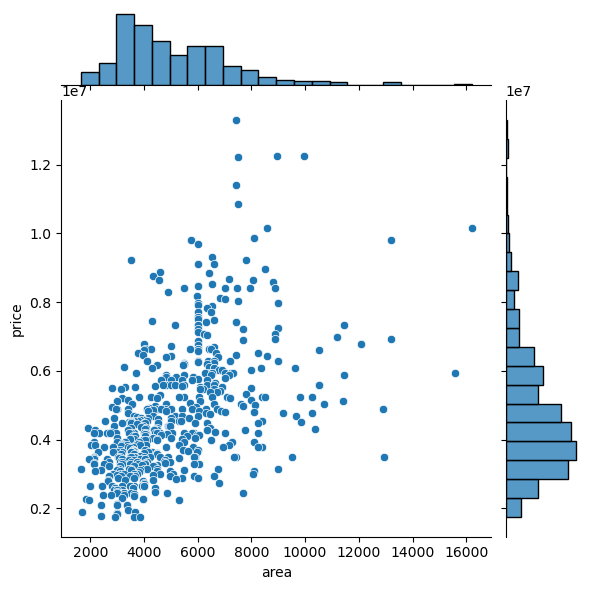

In [187]:
sns.jointplot(x= 'area', y= 'price', data = df)

Text(0.5, 1.0, 'Boxplot for price')

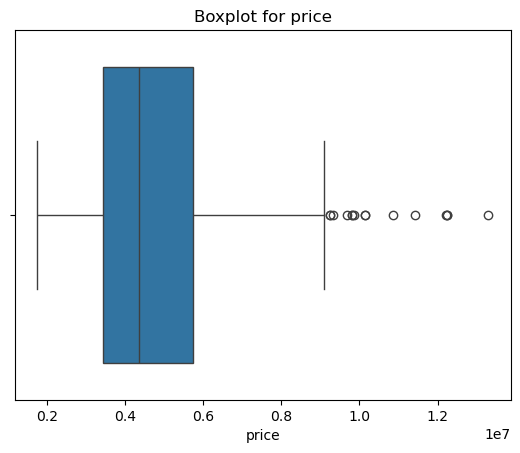

In [188]:

sns.boxplot(x= df['price'])
plt.title('Boxplot for price')

Text(0.5, 1.0, 'Boxplot for area')

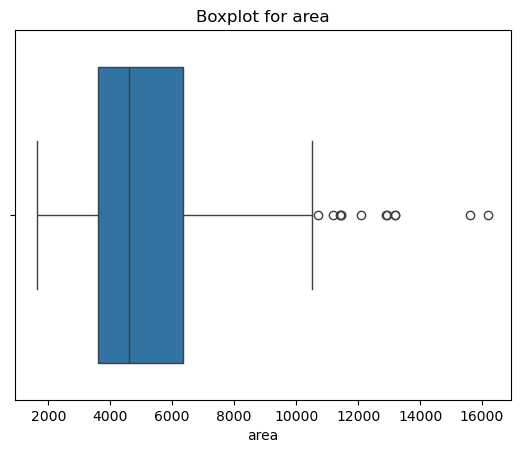

In [189]:
sns.boxplot(x= df['area'])
plt.title('Boxplot for area')

- There are outliers in upper limit of both price and area
- Treating them using IQR method

In [190]:
# Outliers Treatment for Price and area using IQR method

# Price
# Calculate the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['price'] = np.where(df['price'] > upper_bound, df['price'].mean(), np.where(df['price'] < lower_bound, lower_bound, df['price']))





In [191]:
# area
# Calculate the IQR
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['area'] = np.where(df['area'] > upper_bound, df['area'].mean(), np.where(df['area'] < lower_bound, lower_bound, df['area']))


In [192]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.766729e+06,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4.766729e+06,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,4.766729e+06,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4.766729e+06,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4.766729e+06,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='price'>

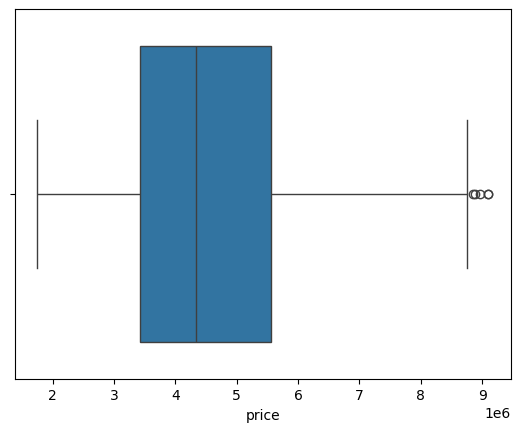

In [193]:
# After Treatment
sns.boxplot(x= df['price'])

<Axes: xlabel='area'>

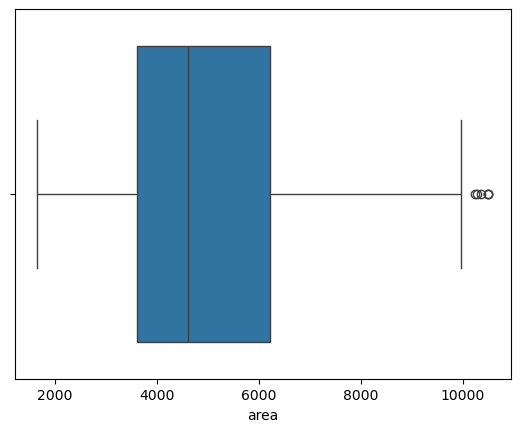

In [194]:
sns.boxplot(x= df['area'])

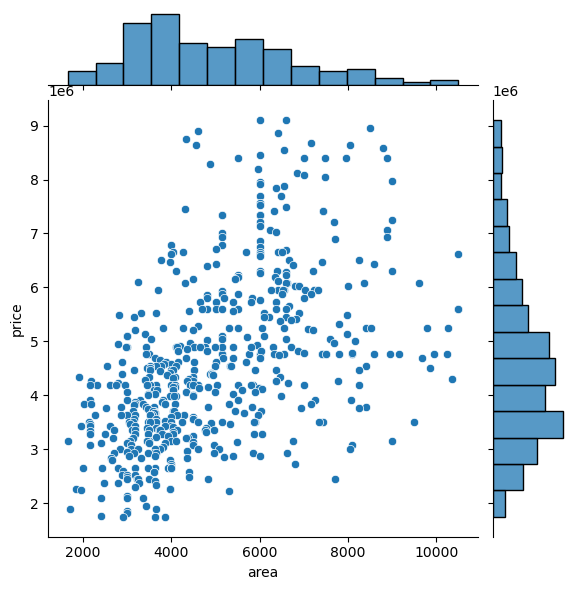

In [195]:
# 
sns.jointplot(x = df['area'], y = df['price'])

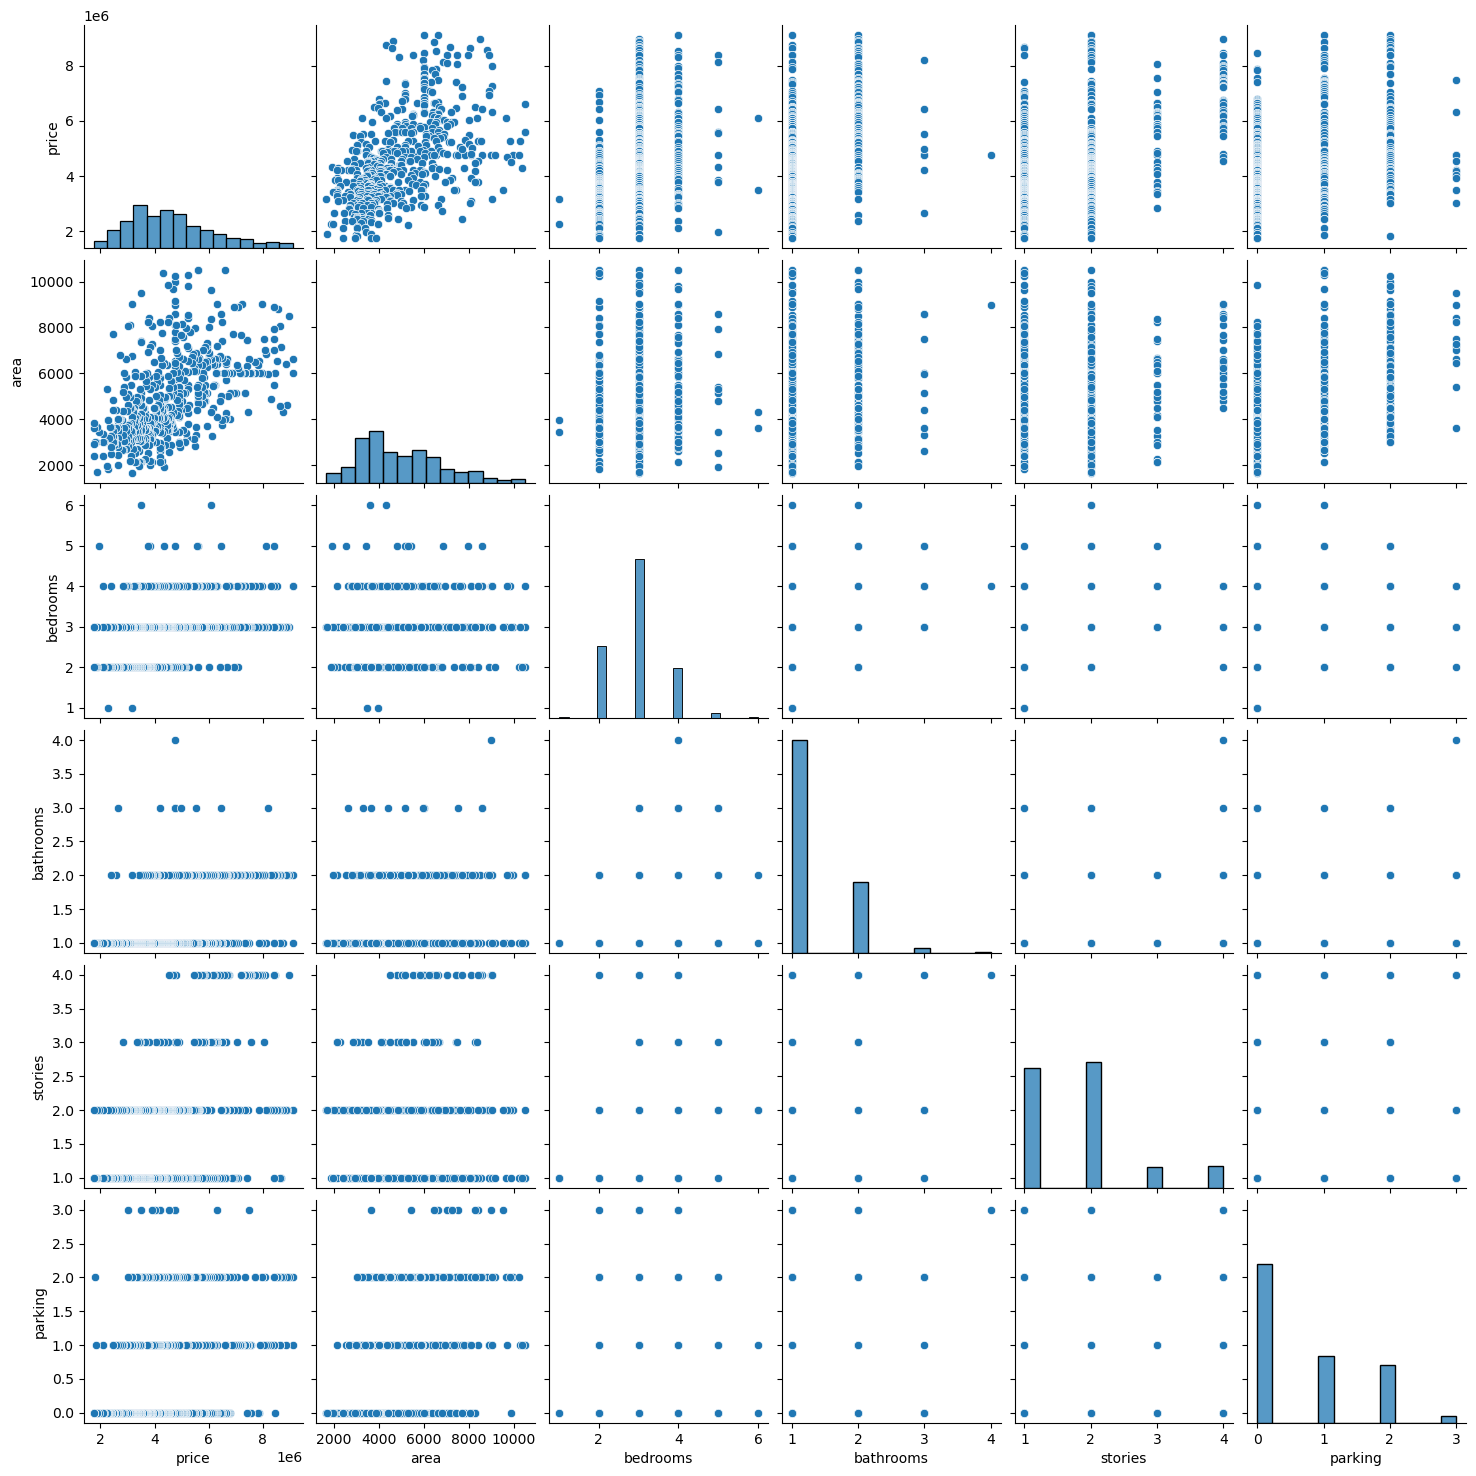

In [196]:
# pairplot to visualize the numerical variables 
sns.pairplot(df)

## Categorical Variables

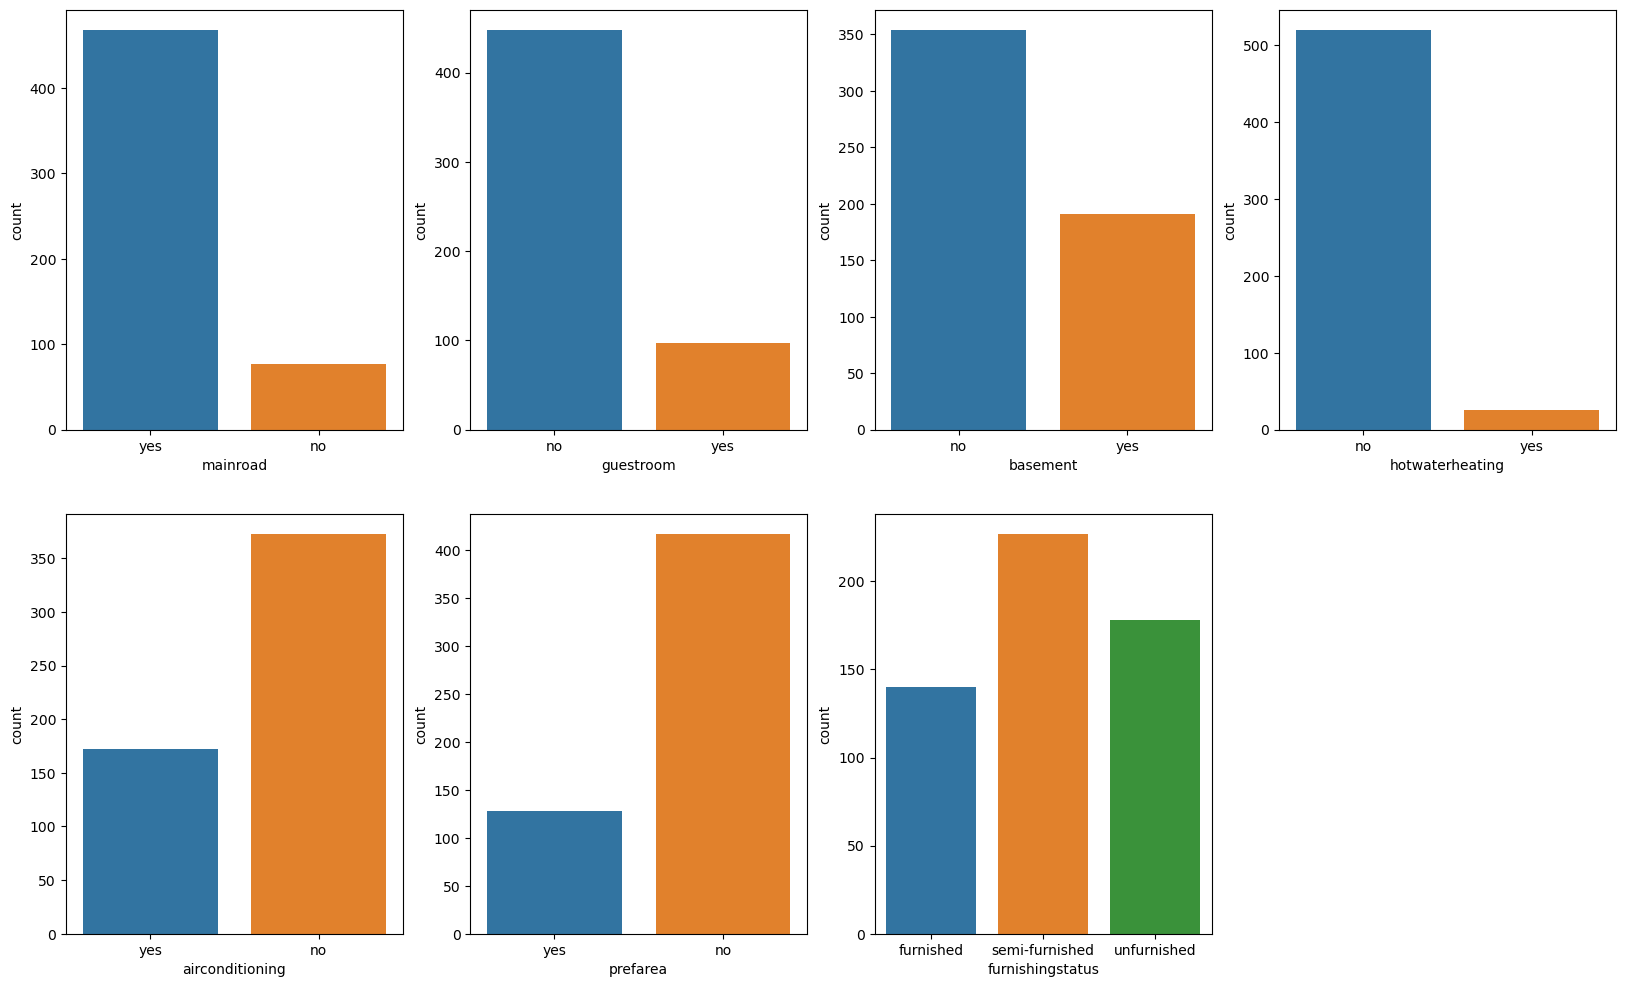

In [197]:
# Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.countplot(x= 'mainroad', data = df, hue= 'mainroad')
plt.subplot(2,4,2)
sns.countplot(x= 'guestroom', data = df, hue= 'guestroom')
plt.subplot(2,4,3)
sns.countplot(x= 'basement', data = df, hue= 'basement')
plt.subplot(2,4,4)
sns.countplot(x= 'hotwaterheating', data = df, hue= 'hotwaterheating')
plt.subplot(2,4,5)
sns.countplot(x= 'airconditioning', data = df, hue= 'airconditioning')
plt.subplot(2,4,6)
sns.countplot(x= 'prefarea', data = df, hue= 'prefarea')
plt.subplot(2,4,7)
sns.countplot(x= 'furnishingstatus', data = df, hue= 'furnishingstatus')
plt.show()

## Dummy Variable Creation
- Creating dummy variables for the categorical values , because the model does not work with them
- 0 - NO , 1 - Yes

In [198]:
# Getting dummies

df2 = pd.get_dummies(df, columns = ['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning', 'prefarea',	'furnishingstatus'], drop_first= True)

In [199]:
df2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.766729e+06,7420.0,4,2,3,2,True,False,False,False,True,True,False,False
1,4.766729e+06,8960.0,4,4,4,3,True,False,False,False,True,False,False,False
2,4.766729e+06,9960.0,3,2,2,2,True,False,True,False,False,True,True,False
3,4.766729e+06,7500.0,4,2,2,3,True,False,True,False,True,True,False,False
4,4.766729e+06,7420.0,4,1,2,2,True,True,True,False,True,False,False,False


In [200]:
# convert the bool dummies into int

bool_columns = df2.select_dtypes(include = ['bool']).columns

df2[bool_columns] = df2[bool_columns].astype(int)

In [201]:
df2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.766729e+06,7420.0,4,2,3,2,1,0,0,0,1,1,0,0
1,4.766729e+06,8960.0,4,4,4,3,1,0,0,0,1,0,0,0
2,4.766729e+06,9960.0,3,2,2,2,1,0,1,0,0,1,1,0
3,4.766729e+06,7500.0,4,2,2,3,1,0,1,0,1,1,0,0
4,4.766729e+06,7420.0,4,1,2,2,1,1,1,0,1,0,0,0


## Correlation Analysis

In [282]:
df2_corr = df2.corr()

<Axes: >

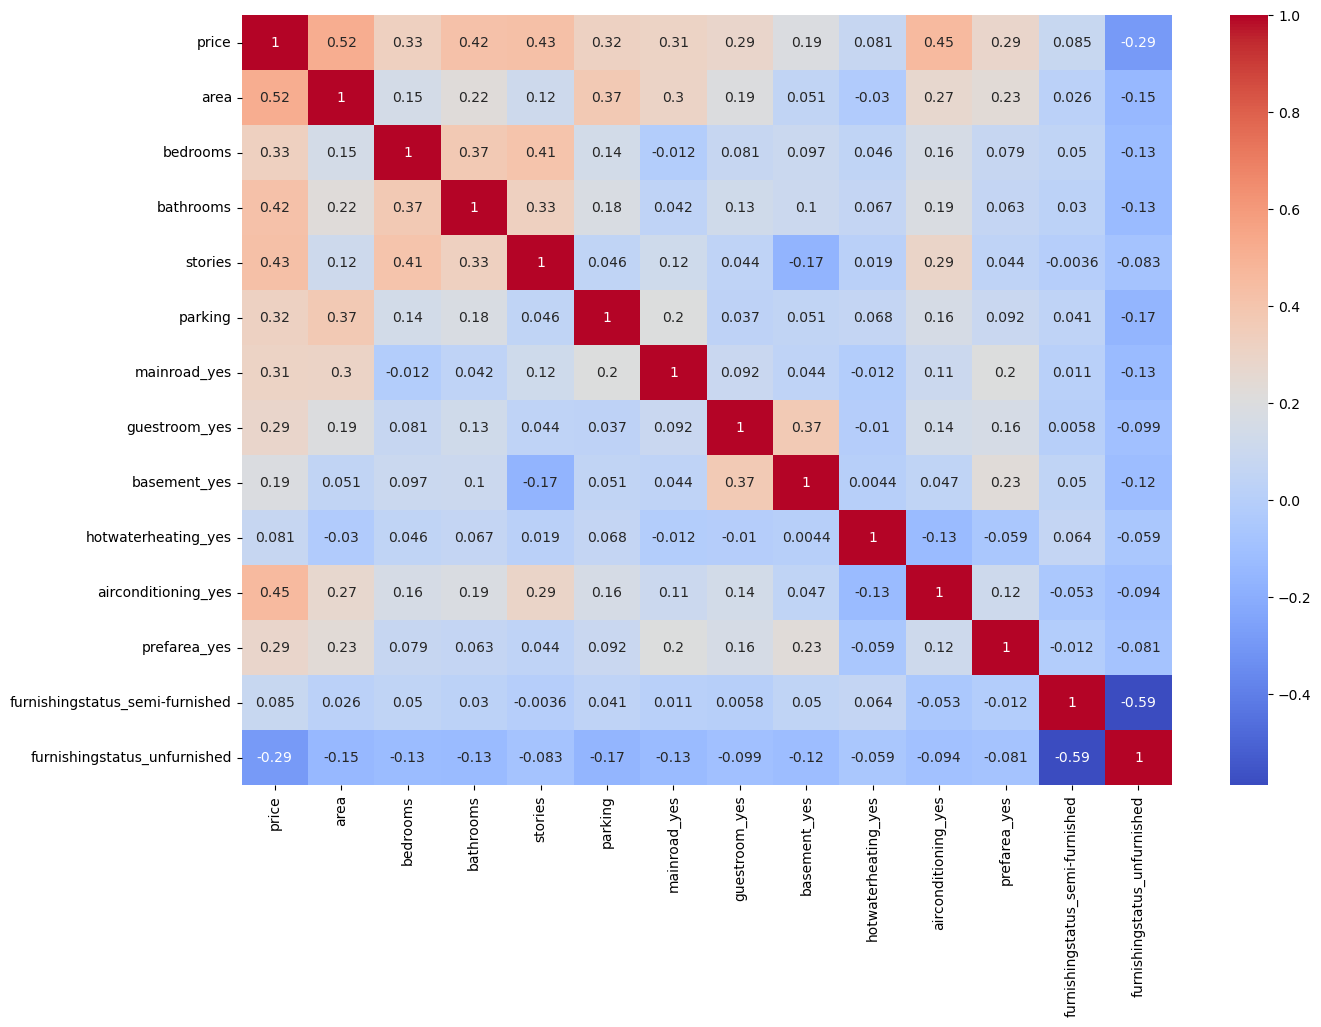

In [203]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df2_corr, annot = True, cmap='coolwarm')

## Multiple Linear Regression (OLS)

In [204]:
# import statsmodels.api
import statsmodels.api as sm

In [205]:
X_multi = df2.drop('price', axis = 1)

In [206]:
X_multi_cons = sm.add_constant(X_multi)

In [207]:
y_multi = df2['price']

In [208]:
ols_model = sm.OLS(y_multi, X_multi_cons).fit()

In [209]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     60.44
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           9.16e-96
Time:                        14:07:18   Log-Likelihood:                -8302.1
No. Observations:                 545   AIC:                         1.663e+04
Df Residuals:                     531   BIC:                         1.669e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            8.633e+05   2.54e+05      3.394      0.001    3.64e+05    1.36e+06
area                              226.4556     28.037      8.077      0.000     171.378     281.533
bedrooms                         8.359e+04   6.87e+04      1.218      0.224   -5.13e+04    2.18e+05
bathrooms                        4.974e+05   9.82e+04      5.065      0.000    3.05e+05     6.9e+05
stories                          4.417e+05   6.07e+04      7.277      0.000    3.22e+05    5.61e+05
parking                          1.355e+05   5.59e+04      2.425      0.016    2.57e+04    2.45e+05
mainroad_yes                      4.86e+05   1.35e+05      3.598      0.000    2.21e+05    7.51e+05
guestroom_yes                    3.601e+05   1.26e+05      2.866      0.004    1.13e+05    6.07e+05
basement_yes                     3.693e+05   1.05e+05      3.531      0.000    1.64e+05    5.75e+05
hotwaterheating_yes              7.235e+05   2.12e+05      3.420      0.001    3.08e+05    1.14e+06
airconditioning_yes              7.556e+05   1.03e+05      7.314      0.000    5.53e+05    9.59e+05
prefarea_yes                     3.783e+05   1.09e+05      3.457      0.001    1.63e+05    5.93e+05
furnishingstatus_semi-furnished -1.002e+04    1.1e+05     -0.091      0.928   -2.27e+05    2.07e+05
furnishingstatus_unfurnished    -4.079e+05   1.19e+05     -3.415      0.001   -6.43e+05   -1.73e+05
==============================================================================
Omnibus:                       29.784   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.418
Skew:                           0.316   Prob(JB):                     4.61e-14
Kurtosis:                       4.518   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The OLS method used every predictor variables, there might be multicollinearity, so i am using different methods.
- removing furnishingstatus_semi-furnished because the p value indicates it is not significant to the variance  to the response variable


## Feature Selection

In [210]:
# Vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2[['area', 'bathrooms', 'stories', 'parking','mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',  'furnishingstatus_unfurnished']]
y = df2['price']

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                         Feature       VIF
0                           area  9.687205
1                      bathrooms  8.035850
2                        stories  6.286015
3                        parking  1.997386
4                   mainroad_yes  6.861056
5                  guestroom_yes  1.475362
6                   basement_yes  1.902392
7            hotwaterheating_yes  1.090257
8            airconditioning_yes  1.749305
9                   prefarea_yes  1.479631
10  furnishingstatus_unfurnished  1.413388


- dropped, bedroom cause of high vif value

In [211]:
#feature selection with rfe and cross validation

from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=11)
rfe = rfe.fit(X, y)

In [212]:
print("Feature Ranking:", rfe.ranking_)

Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1]


In [213]:
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['area', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished'],
      dtype='object')


In [214]:
# Optimal number of features
# Define the model
model = LinearRegression()

# Define the range of the number of features to test
feature_counts = range(1, X.shape[1] + 1)

# Initialize lists to store results
mean_scores = []

for n_features in feature_counts:
    # Initialize RFE with the model and the number of features to select
    rfe = RFE(model, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, y)
    
    # Perform cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation
    scores = cross_val_score(model, X_rfe, y, cv=cv, scoring='r2')  # Change scoring as needed
    mean_scores.append(np.mean(scores))

# Find the optimal number of features
optimal_num_features = feature_counts[np.argmax(mean_scores)]
print("Optimal Number of Features:", optimal_num_features)


Optimal Number of Features: 11


### Using the selected features in techniques like OLS, Lasso, Ridge, and LinearRegression

## OLS Method

In [270]:
# Ols using relevant feautres

X_ols = df2[selected_features]
X_ols_cons = sm.add_constant(X_ols)

y_ols = df2['price']

ols_rel = sm.OLS(y_ols, X_ols_cons).fit()

# Get predictions
y_pred_ols = ols_rel.predict(X_ols_cons)

ols_adj_r2 = ols_rel.rsquared_adj

print("Adjusted r squared:" ,ols_adj_r2)

# Compute Mean Squared Error (MSE)
ols_mse = mean_squared_error(y_ols, y_pred_ols)
print("Mean Squared Error:", ols_mse)

ols_rel.summary()



Adjusted r squared: 0.5872485326569756
Mean Squared Error: 1000314061600.3248


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     71.36
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.67e-97
Time:                        15:36:34   Log-Likelihood:                -8302.9
No. Observations:                 545   AIC:                         1.663e+04
Df Residuals:                     533   BIC:                         1.668e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.023e+06   1.97e+05      5.196      0.000    6.36e+05    1.41e+06
area                           228.0970     27.990      8.149      0.000     173.112     283.082
bathrooms                     5.244e+05   9.56e+04      5.484      0.000    3.37e+05    7.12e+05
stories                       4.676e+05   5.68e+04      8.226      0.000    3.56e+05    5.79e+05
parking                       1.408e+05   5.57e+04      2.531      0.012    3.15e+04     2.5e+05
mainroad_yes                  4.673e+05   1.34e+05      3.490      0.001    2.04e+05     7.3e+05
guestroom_yes                  3.57e+05   1.25e+05      2.845      0.005    1.11e+05    6.04e+05
basement_yes                  3.866e+05   1.04e+05      3.732      0.000    1.83e+05     5.9e+05
hotwaterheating_yes           7.279e+05   2.11e+05      3.445      0.001    3.13e+05    1.14e+06
airconditioning_yes           7.554e+05   1.03e+05      7.349      0.000    5.53e+05    9.57e+05
prefarea_yes                  3.822e+05   1.09e+05      3.498      0.001    1.68e+05    5.97e+05
furnishingstatus_unfurnished -4.077e+05   9.56e+04     -4.262      0.000   -5.96e+05    -2.2e+05
==============================================================================
Omnibus:                       31.415   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.261
Skew:                           0.328   Prob(JB):                     4.09e-15
Kurtosis:                       4.577   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Ols has problem with multi collinearity so we are using other techniques like ridge, lasso and linear regression

## Train Test Split

In [216]:
# assign variables
X_multi = df2[selected_features]
y_multi= df2['price']

In [217]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)

## Standardize the X values


In [218]:
# import preprocessing

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

## Lasso Method


In [219]:
from sklearn.linear_model import Lasso

In [220]:
lasso = Lasso(alpha = 0.4)

In [221]:
lasso.fit(X_train_s, y_train)

Lasso(alpha=0.4)

In [222]:
y_pred_lasso = lasso.predict(X_test_s)

In [274]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
print('r2_score:', lasso_r2)

r2_score: 0.5154373406648387


In [275]:
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print('mse:', lasso_mse)

mse: 1045004245181.603


## Using validation curve i can choose the best value for alpha 

In [225]:
# range
param_range = np.logspace(-2, 8, 100)
# validation curve
train_scores_lasso, test_scores_lasso = validation_curve(Lasso(), X_train_s, y_train, param_name = 'alpha', param_range= param_range, cv = 3, scoring = 'r2')

In [226]:
train_mean_lasso = np.mean(train_scores_lasso, axis = 1)
test_mean_lasso = np.mean(test_scores_lasso, axis = 1)

In [227]:
max(test_mean_lasso)

0.5925639272693396

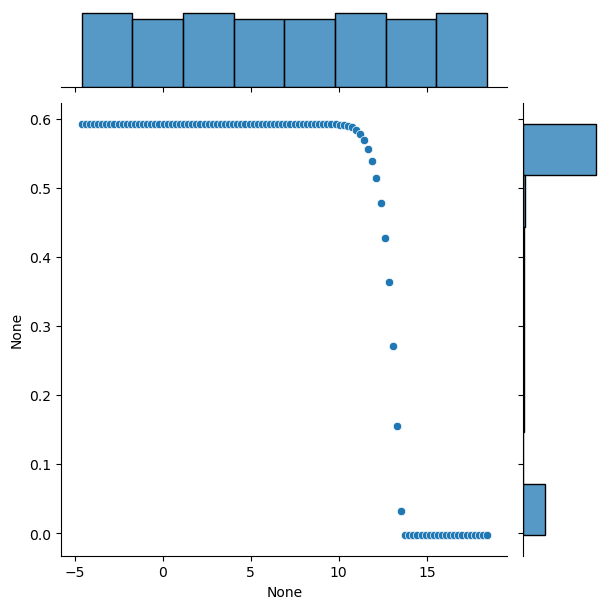

In [228]:
sns.jointplot( x = np.log(param_range) , y = test_mean_lasso)

In [229]:
np.where(test_mean_lasso == max(test_mean_lasso))

(array([51], dtype=int64),)

In [230]:
param_range[51]

1417.4741629268049

### Using the alpha value in Lasso that i got from validation curve

In [231]:
lasso_vc = Lasso(alpha = param_range[51])

In [232]:
lasso_vc.fit(X_train_s, y_train)

Lasso(alpha=1417.4741629268049)

In [233]:
y_pred_lasso_vc = lasso_vc.predict(X_test_s)

In [279]:
lasso_vc_r2 =r2_score(y_test, y_pred_lasso_vc)
print('r2_score:', lasso_vc_r2)

r2_score: 0.5160665798408889


In [278]:
lasso_vc_mse = mean_squared_error(y_test, y_pred_lasso_vc)
print('mse:', lasso_vc_mse)

mse: 1043647232631.1329


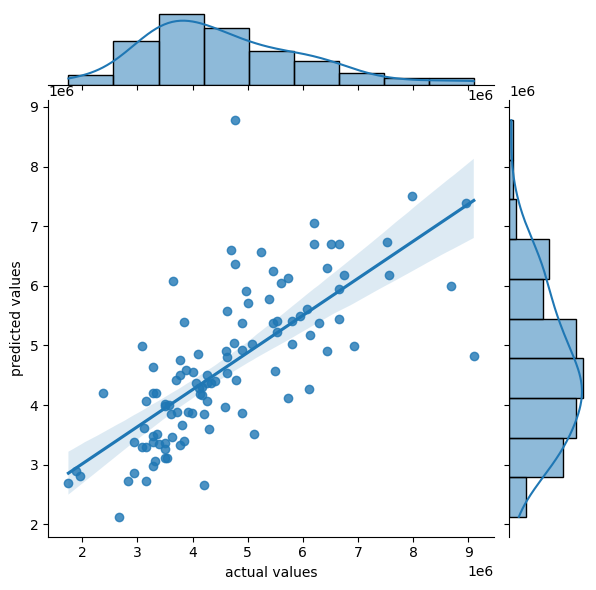

In [236]:
# regression plot 
sns.jointplot( x = y_test, y= y_pred_lasso_vc, kind ='reg')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

## Ridge regression 

In [237]:
# import Ridge
from sklearn.linear_model import Ridge

In [238]:
# fit model
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [239]:
# predict
y_pred_ridge = ridge.predict(X_test_s)


In [240]:
r2_score(y_test, y_pred_ridge)

0.5155938085453937

In [241]:
mean_squared_error(y_test, y_pred_ridge)

1044666807708.3174

## Validation curve

In [242]:
# Validation curve
train_scores_ridge, test_scores_ridge = validation_curve(Ridge(), X_train_s, y_train, param_name = 'alpha', param_range= param_range, cv = 3, scoring = 'r2')

In [243]:
train_mean_ridge = np.mean(train_scores_ridge, axis = 1)
test_mean_ridge = np.mean(test_scores_ridge, axis = 1)

In [244]:
max(train_mean_ridge)

0.6130792172056388

In [245]:
max(test_mean_ridge)

0.5928799626407243

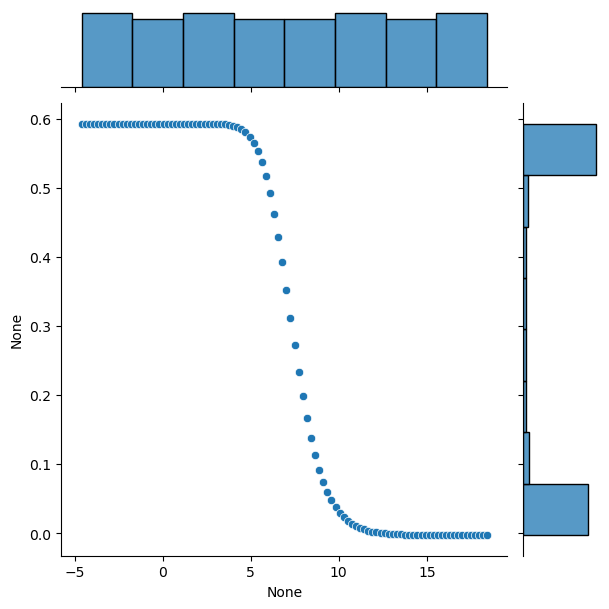

In [246]:
sns.jointplot( x = np.log(param_range) , y = test_mean_ridge)

In [247]:
np.where(test_mean_ridge == max(test_mean_ridge))

(array([30], dtype=int64),)

In [248]:
param_range[30]

10.722672220103231

### Using the alpha value i got by doing validation curve in Ridge regression

In [249]:
ridge_vc = Ridge(alpha = param_range[30])

In [250]:
ridge_vc.fit(X_train_s, y_train)

Ridge(alpha=10.722672220103231)

In [251]:
y_pred_ridgevc = ridge_vc.predict(X_test_s)

In [283]:
ridge_vc_r2 = r2_score(y_test, y_pred_ridgevc)
print('r2_score:', ridge_vc_r2)

r2_score: 0.5186087092760041


In [284]:
ridge_vc_mse = mean_squared_error(y_test, y_pred_ridgevc)
print('mse:', ridge_vc_mse)

mse: 1038164895104.0493


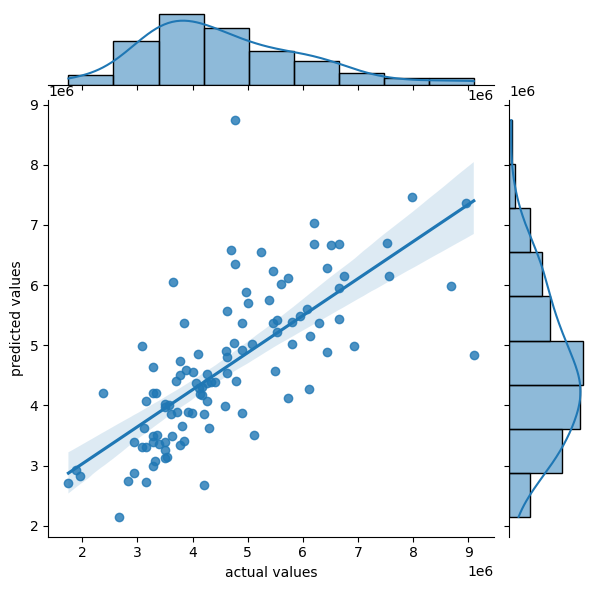

In [254]:
# linear regression plot 
sns.jointplot( x = y_test, y= y_pred_ridgevc, kind ='reg')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

## Linear Regression from sklearn

In [297]:
# model fitting
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [298]:
# predict
y_pred_lr = lr.predict(X_test)

In [299]:
# r2 and mse
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)

In [300]:
print('r2_score:', lr_r2, 
      'mse:', lr_mse)

r2_score: 0.5154371593932047 mse: 1045004636110.6675


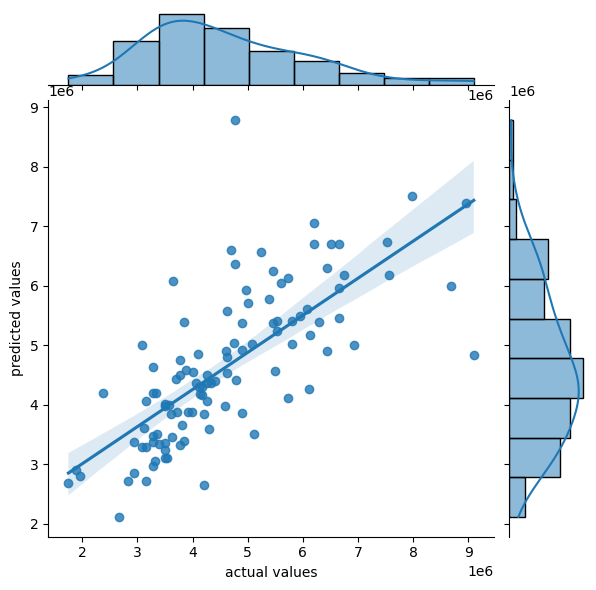

In [301]:
sns.jointplot( x = y_test, y= y_pred_lr, kind ='reg')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

## Model performance 

In [307]:
# Create dictionaries to store R-squared and MSE for each model
r2_scores = {
    'Ridge': ridge_vc_r2,
    'Lasso': lasso_vc_r2,
    'Linear Regression': lr_r2
}

mse_scores = {
    'Ridge': ridge_vc_mse,
    'Lasso': lasso_vc_mse,
    'Linear Regression': lr_mse
}

# Find the model with the highest R-squared
best_r2_model = max(r2_scores, key=r2_scores.get)
best_r2_value = r2_scores[best_r2_model]

# Find the model with the lowest MSE
best_mse_model = min(mse_scores, key=mse_scores.get)
best_mse_value = mse_scores[best_mse_model]

# Print the results
print(f"Model with the highest R-squared: {best_r2_model} ({best_r2_value:.4f})")
print(f"Model with the lowest MSE: {best_mse_model} ({best_mse_value:.4f})")

Model with the highest R-squared: Ridge (0.5186)
Model with the lowest MSE: Ridge (1038164895104.0493)


- The Ridge regression model is better performing